Interação com usuario

#importação de bibliotecas e def da função


In [ ]:
from pandas.core.arrays.categorical import CategoricalAccessor
import datetime
from datetime import date
import pandas as pd
from google.colab import drive
import joblib
# Acesso ao Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

def predicao(data_input,Hora_início,Minuto_início,Hora_fim,Minuto_fim,Feriado_input,Categoria,modelo):
  #formata input de data
  data_input = data_input.split('-')
  dia = float(data_input[2])
  mes = float(data_input[1])
  ano = float(data_input[0])
  data_input = datetime.date(int(data_input[0]), int(data_input[1]), int(data_input[2]))
  Dia_da_semana = data_input.weekday()
  
  #Mensagem de erro se colocar o ano maior que 2100
  if ano > 2100:
     print('Ano invalido, coloque um valor menor que 2100')
  
  #Conversão de tempo para números que o modelo entende
  Hora_início = Hora_início + (Minuto_início/60)
  Hora_fim = Hora_fim + (Minuto_fim/60)
  horarios = [Hora_início]
  h = Hora_início+5/60
  while h<Hora_fim:

    horarios.append(h)
    h+=5/60
  
  horarios.append(Hora_fim)

  #formatação de dia da semana para o modelo
  S = [0,0,0,0,0,0,0,0]              
  if Dia_da_semana == 'Domingo':
      S[1] = 1
  elif Dia_da_semana == 'Segunda-Feira':
      S[2] = 1
  elif Dia_da_semana == 'Terça-Feira':
      S[3] = 1
  elif Dia_da_semana == 'Quarta-Feira':
      S[4] = 1
  elif Dia_da_semana == 'Quinta-Feira':
      S[5] = 1
  elif Dia_da_semana == 'Sexta-Feira':
      S[6] = 1
  else:
      S[7] = 1

  #formatação input 'categoria'
  Categorias =[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
  if Categoria == 'Jornalismo':
    Categorias[13] = 1 
  elif Categoria == 'Auditório':
    Categorias[0] = 1 
  elif Categoria == 'Filme':
    Categorias[9] = 1 
  elif Categoria == 'Novela':
    Categorias[17] = 1 
  elif Categoria == 'Series':
    Categorias[27] = 1 
  elif Categoria == 'Entrevista':
    Categorias[6] = 1 
  elif Categoria == 'Reality show':
    Categorias[21] = 1 
  elif Categoria == 'BBB':
    Categorias[22] = 1 
  elif Categoria == 'Humorístico':
    Categorias[12] = 1 
  elif Categoria == 'Reportagem':
    Categorias[24] = 1 
  elif Categoria == 'Educativo':
    Categorias[5] = 1 
  elif Categoria == 'Documentário':
    Categorias[4] = 1 
  elif Categoria == 'Futebol':
    Categorias[10] = 1 
  elif Categoria == 'Esporte':
    Categorias[7] = 1 
  elif Categoria == 'Político':
    Categorias[19] = 1 
  elif Categoria == 'Show':
    Categorias[27] = 1 
  elif Categoria == 'Feminino':
    Categorias[8] = 1 
  elif Categoria == 'Debate':
    Categorias[3] = 1 
  elif Categoria == 'Musical':
    Categorias[15] = 1 
  elif Categoria == 'Religioso':
    Categorias[23] = 1 
  elif Categoria == 'Sorteio':
    Categorias[28] = 1 
  elif Categoria == 'Minissérie':
    Categorias[14] = 1 
  elif Categoria == 'Não consta':
    Categorias[16] = 1 
  elif Categoria == 'Outros':
    Categorias[18] = 1 
  elif Categoria == 'Culinário':
    Categorias[2] = 1 
  elif Categoria == 'Televendas':
    Categorias[29] = 1 
  elif Categoria == 'Rural':
    Categorias[25] = 1 
  elif Categoria == 'Carros e motores':
    Categorias[1] = 1 
  elif Categoria == 'Premiação':
    Categorias[20] = 1 
  elif Categoria == 'Game show':
    Categorias[12] = 1 
  elif Categoria == 'JOGOS OLIMP INVERNO MAD':
    Categorias[30] = 1 
  elif Categoria == 'JOGOS OLIMPICOS MAD':
    Categorias[31] = 1 
  elif Categoria == 'JOGOS OLIMPICOS MAD CONT':
    Categorias[32] = 1 
  elif Categoria == 'JOGOS OLIMPICOS MAT':
    Categorias[33] = 1 
  elif Categoria == 'JOGOS OLIMPICOS MAT ANT':
    Categorias[34] = 1 
  elif Categoria == 'JOGOS OLIMPICOS NOT':
    Categorias[35] = 1 
  elif Categoria == 'JOGOS PARALIMPICOS MAT':
    Categorias[36] = 1 
  elif Categoria == 'JOGOS PARALIMPICOS MAT ANT':
    Categorias[37] = 1 
  elif Categoria == 'INFANTIL':
    Categorias[38] = 1 
  elif Categoria == 'SAUDE':
    Categorias[39] = 1 
  elif Categoria == 'DESENHO ADULTO':
    Categorias[40] = 1 
  elif Categoria == 'COPA DO MUNDO':
    Categorias[41] = 1 

  #Cria um dataSet de saída
  column_names = ['Hora', 'Prediction', 'Acurácia']
  resultadoOutput = pd.DataFrame(columns = column_names)

  #importa modelo treinado
  model = joblib.load(f'/content/drive/Shareddrives/hefEStos: arquivo X/treinados/{modelo}')
  print(model)

  #para cada horario no intervalo do input, é feita a predição com os parametros passados
  for i in horarios:
    predict = {'Dia' : dia,
           'Mes' : mes,
           'Ano' : ano,
           'Dia da Semana_Segunda' : S[2],
           'Dia da Semana_Terça' : S[3],
           'Dia da Semana_Quarta' : S[4],
           'Dia da Semana_Quinta' : S[5],
           'Dia da Semana_Sexta' : S[6],
           'Dia da Semana_Sábado' : S[7],
           'Dia da Semana_Domingo' : S[1],
           'Hora Início': i,
           'Feriado': Feriado_input,
           'Categoria_1': [Categorias[0]],
           'Categoria_2': [Categorias[1]],
           'Categoria_3': [Categorias[2]],
           'Categoria_4': [Categorias[3]],
           'Categoria_5': [Categorias[4]],
           'Categoria_6': [Categorias[5]],
           'Categoria_7': [Categorias[6]],
           'Categoria_8': [Categorias[7]],
           'Categoria_9': [Categorias[8]],
           'Categoria_10': [Categorias[9]],
           'Categoria_11': [Categorias[10]],
           'Categoria_12': [Categorias[11]],
           'Categoria_13': [Categorias[12]],
           'Categoria_14': [Categorias[13]],
           'Categoria_15': [Categorias[14]],
           'Categoria_16': [Categorias[15]],
           'Categoria_17': [Categorias[16]],
           'Categoria_18': [Categorias[17]],
           'Categoria_19': [Categorias[18]],
           'Categoria_20': [Categorias[19]],
           'Categoria_21': [Categorias[20]],
           'Categoria_22': [Categorias[21]],
           'Categoria_23': [Categorias[22]],
           'Categoria_24': [Categorias[23]],
           'Categoria_25': [Categorias[24]],
           'Categoria_26': [Categorias[25]],
           'Categoria_27': [Categorias[26]],
           'Categoria_28': [Categorias[27]],
           'Categoria_29': [Categorias[28]],
           'Categoria_30': [Categorias[29]],
           'Categoria_31': [Categorias[30]],
           'Categoria_32': [Categorias[31]],
           'Categoria_33': [Categorias[32]],
           'Categoria_34': [Categorias[33]],
           'Categoria_35': [Categorias[34]],
           'Categoria_36': [Categorias[35]],
           'Categoria_37': [Categorias[36]],
           'Categoria_38': [Categorias[37]],
           'Categoria_39': [Categorias[38]],
           'Categoria_40': [Categorias[39]],
           'Categoria_41': [Categorias[40]],
           'Categoria_42': [Categorias[41]]
           }
    
    X_pred_user = pd.DataFrame(predict)
    
    #arruma ordem dos parametros
    X_pred_user = X_pred_user[['Hora Início', 'Feriado', 'Categoria_37', 'Categoria_38', 'Categoria_1',
       'Categoria_10', 'Categoria_11', 'Categoria_12', 'Categoria_13',
       'Categoria_14', 'Categoria_15', 'Categoria_16', 'Categoria_17',
       'Categoria_18', 'Categoria_19', 'Categoria_2', 'Categoria_20',
       'Categoria_21', 'Categoria_22', 'Categoria_23', 'Categoria_24',
       'Categoria_25', 'Categoria_26', 'Categoria_27', 'Categoria_28',
       'Categoria_29', 'Categoria_3', 'Categoria_30', 'Categoria_31',
       'Categoria_32', 'Categoria_33', 'Categoria_34', 'Categoria_35',
       'Categoria_36', 'Categoria_39', 'Categoria_4', 'Categoria_40',
       'Categoria_41', 'Categoria_42', 'Categoria_5', 'Categoria_6',
       'Categoria_7', 'Categoria_8', 'Categoria_9', 'Dia', 'Mes', 'Ano',
       'Dia da Semana_Domingo', 'Dia da Semana_Quarta', 'Dia da Semana_Quinta',
       'Dia da Semana_Segunda', 'Dia da Semana_Sexta', 'Dia da Semana_Sábado',
       'Dia da Semana_Terça']]
    
    
    y_pred_user = model.predict(X_pred_user, num_iteration = model.best_iteration_)
    results = {'Hora': i, 'Prediction': y_pred_user}
    df_results = pd.DataFrame(results)
    #print(results)
    if y_pred_user[0]<0:
      resultadoOutput = resultadoOutput.append({'Hora': i, 'Prediction': 0}, ignore_index = True)
    else:
      resultadoOutput = resultadoOutput.append({'Hora': i, 'Prediction': y_pred_user[0]}, ignore_index = True)
  grafico = resultadoOutput.plot(x = 'Hora', y = 'Prediction')
  media = resultadoOutput['Prediction'].mean()
  return(grafico, f'media de audiencia: {media}%')

  
          

#Saída

LGBMRegressor(feature_fraction=1, learning_rate=0.5, max_depth=16,
              metric=['l1', 'l2'], num_iterations=20000, num_leaves=256,
              objective='regression', task='train', verbose=0)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f1b0c5cefd0>,
 'media de audiencia: 2.884492930175015%')

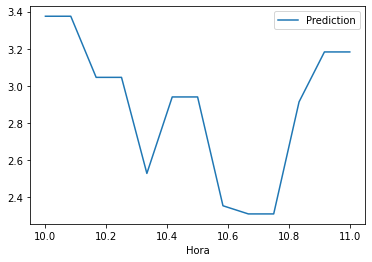

In [ ]:
data_input = '2022-11-30' #@param {type:"date"}
Hora_início = 10 #@param {type:"number"}
Minuto_início = 00 #@param {type:"number"}
Hora_fim = 11 #@param {type:"number"}
Minuto_fim = 00 #@param {type:"number"}
Feriado_input = False #@param {type:"boolean"}
Categoria = 'Auditório' #@param ["Jornalismo", "Auditório", "Filme", "Novela", "Series", "Entrevista", "Reality show", "BBB", "Humorístico", "Reportagem", "Educativo", "Documentário", "Futebol", "Esporte", "Político", "Show", "Feminino", "Debate", "Musical", "Religioso", "Sorteio", "Minissérie", "Não consta", "Outros", "Culinário", "Televendas", "Rural", "Carros e motores", "Premiação", "Game show", "JOGOS OLIMP INVERNO MAD","JOGOS OLIMPICOS MAD","JOGOS OLIMPICOS MAD CONT","JOGOS OLIMPICOS MAT","JOGOS OLIMPICOS MAT ANT","JOGOS OLIMPICOS NOT","JOGOS PARALIMPICOS MAT", "JOGOS PARALIMPICOS MAT ANT", "INFANTIL", "SAUDE", "DESENHO ADULTO", "COPA DO MUNDO"]
modelo = "lgbm_tot_rat%.pkl"#@param ['lgbm_12_17_fid%.pkl','lgbm_12_17_rat%.pkl','lgbm_12_17_shr%.pkl','lgbm_18_24_fid%.pkl','lgbm_18_24_rat%.pkl','lgbm_18_24_shr%.pkl', 'lgbm_25_34_fid%.pkl', 'lgbm_25_34_rat%.pkl', 'lgbm_25_34_shr%.pkl', 'lgbm_35_49_fid%.pkl', 'lgbm_35_49_rat%.pkl', 'lgbm_35_49_shr%.pkl', 'lgbm_4_11_fid%.pkl', 'lgbm_4_11_rat%.pkl', 'lgbm_4_11_shr%.pkl', 'lgbm_50_59_fid%.pkl', 'lgbm_50_59_rat%.pkl','lgbm_50_59_shr%.pkl', 'lgbm_60+_rat%.pkl', 'lgbm_60_fid%.pkl','lgbm_60_shr%.pkl', 'lgbm_AB_rat%.pkl', 'lgbm_AB_shr%.pkl', 'lgbm_C1_rat%.pkl', 'lgbm_C1_shr%.pkl', 'lgbm_C2_rat%.pkl', 'lgbm_C2_shr%.pkl', 'lgbm_DE_rat%.pkl', 'lgbm_DE_shr%.pkl', 'lgbm_ab_fid%.pkl', 'lgbm_c1_fid%.pkl', 'lgbm_c2_fid%.pkl', 'lgbm_de_fid%.pkl', 'lgbm_fem_fid%.pkl', 'lgbm_fem_rat%.pkl', 'lgbm_fem_shr%.pkl', 'lgbm_masc_fid%.pkl', 'lgbm_masc_rat%.pkl','lgbm_masc_shr%.pkl', 'lgbm_tot_rat%.pkl', 'lgbm_tot_shr%.pkl']

predicao(data_input,Hora_início,Minuto_início,Hora_fim,Minuto_fim,Feriado_input,Categoria,modelo)
